Note: for data sets not filtered by the kiethly use the filter when doing option 5
Graham's Computer or Lab: G/L? l
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Analysis 1

X coordinate of sample 21
Y coordinate of sample 2
Current through sample (mA) 1
enter: 1 for single graph, 2 for two comparative trial graphs, 3 to create PDF of all trials 
4 for separated single graph, 5 for Quad Split
Which option listed above? 3
Split into two graphs of increasing field and decreasing field, Y/N? n
PDF Created: Sample 21by2_1mA.pdf
Continue with this sample, Y/N? y
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Analysis 2

enter: 1 for single graph, 2 for two comparative trial graphs, 3 to create PDF of all trials 
4 for separated single graph, 5 for Quad Split
Which option listed above? 3
Split into two graphs of increasing field and decreasing field, Y/N? y
PDF Created: Sample 21by2_1mA Graph Split.pdf
Continue with this sample, Y/N? n
Change sample, Y/N? n
Good bye


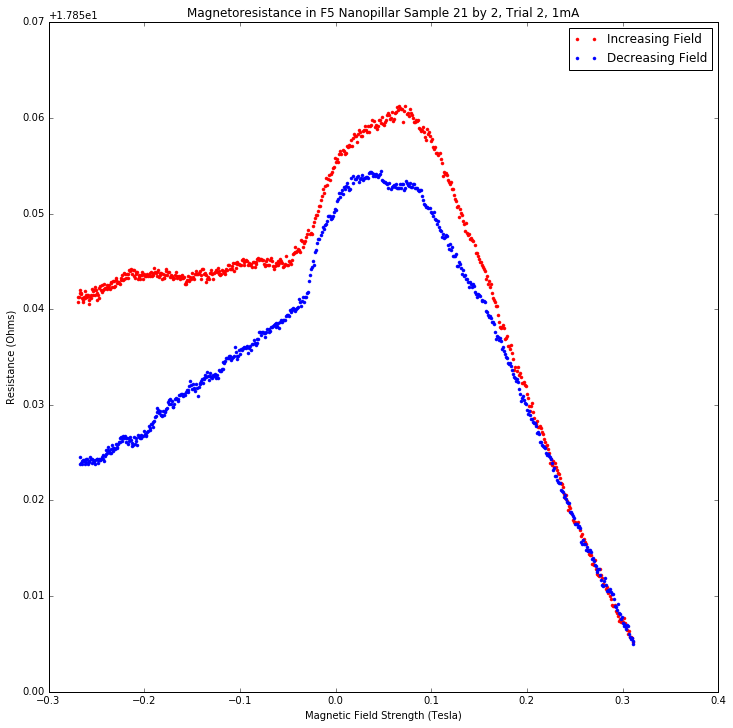

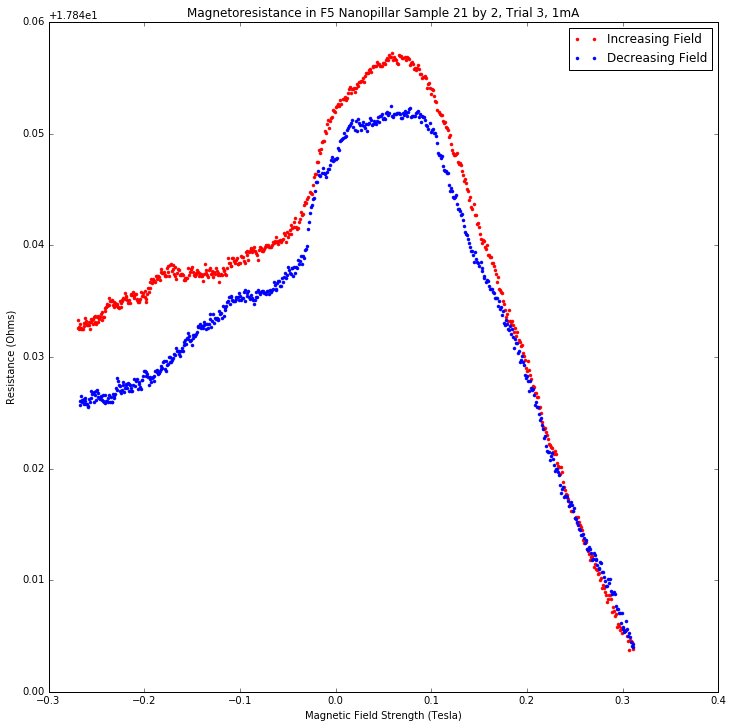

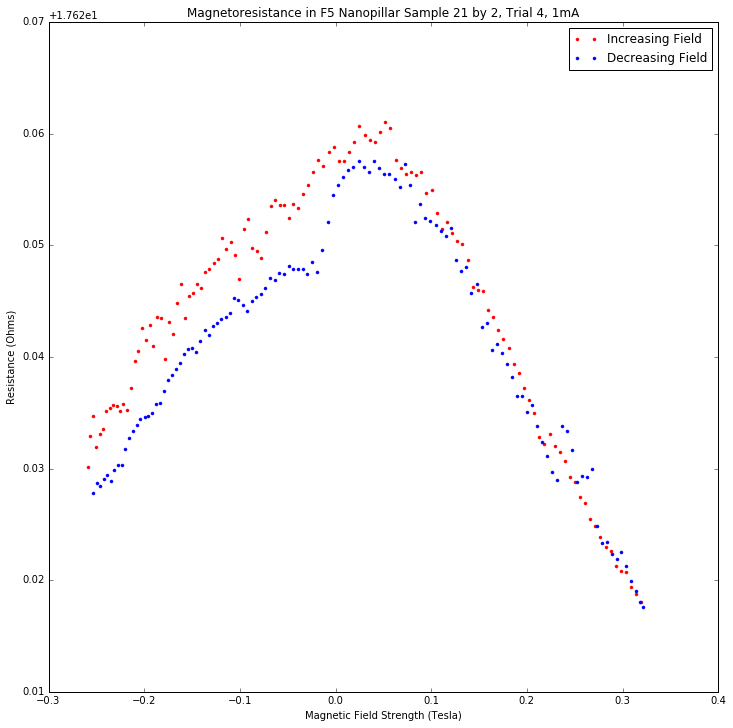

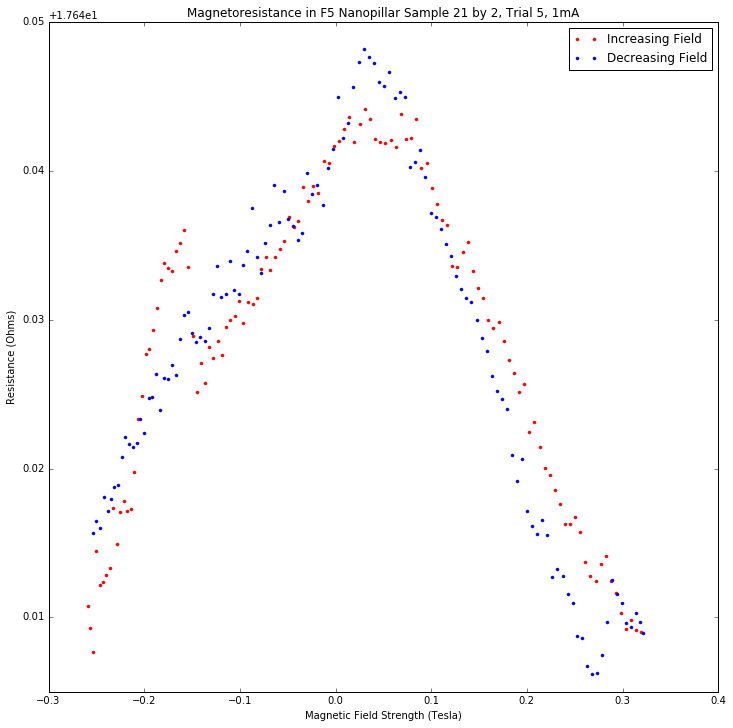

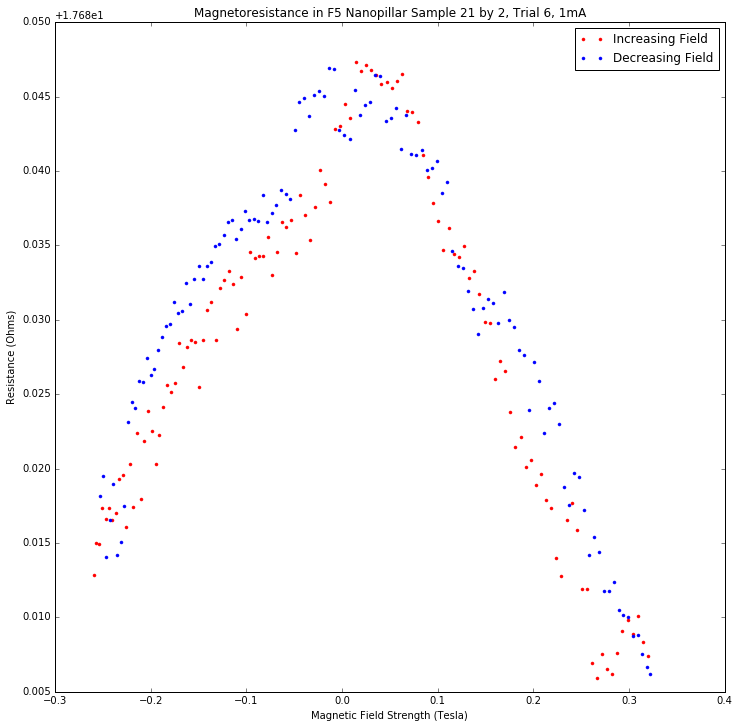

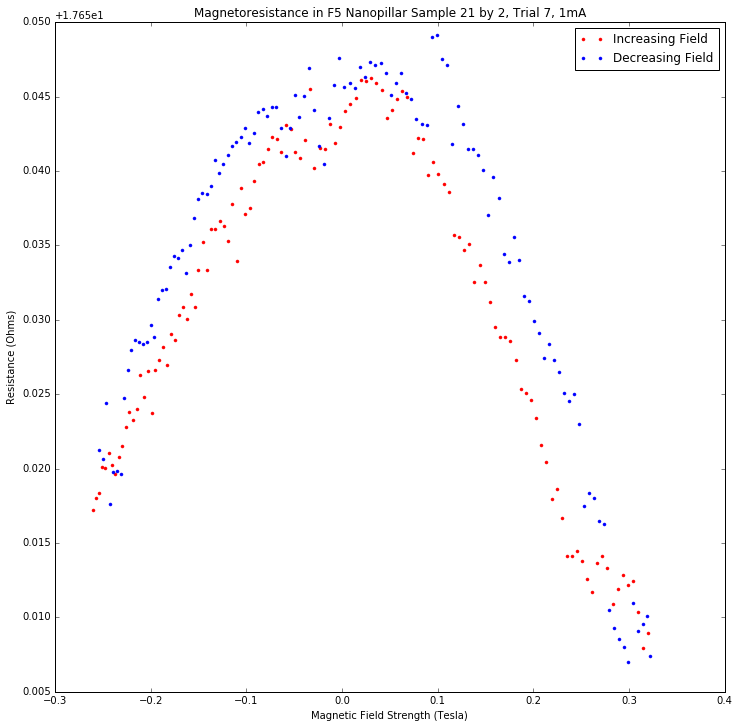

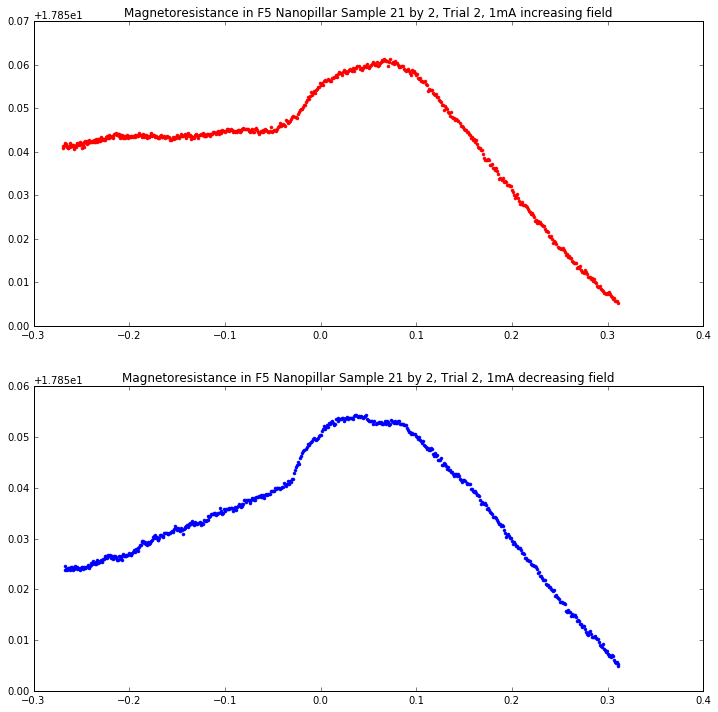

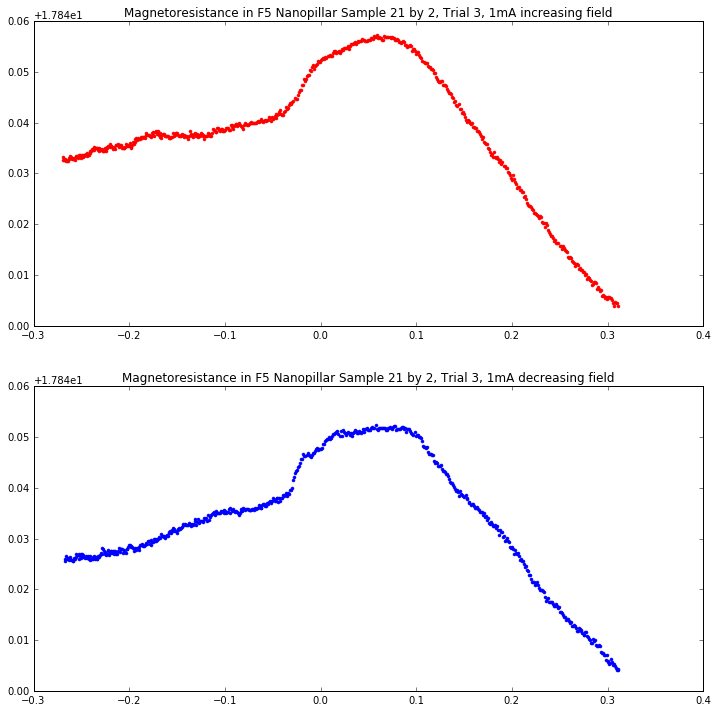

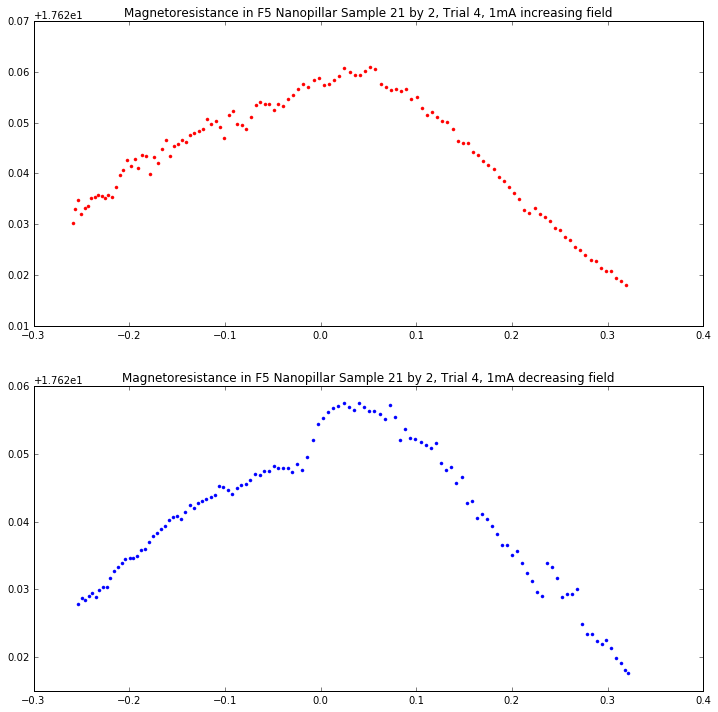

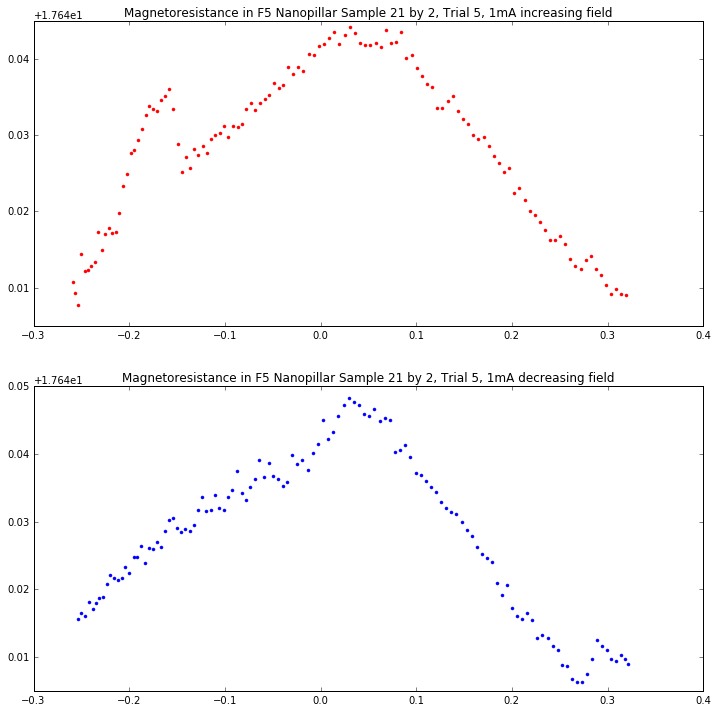

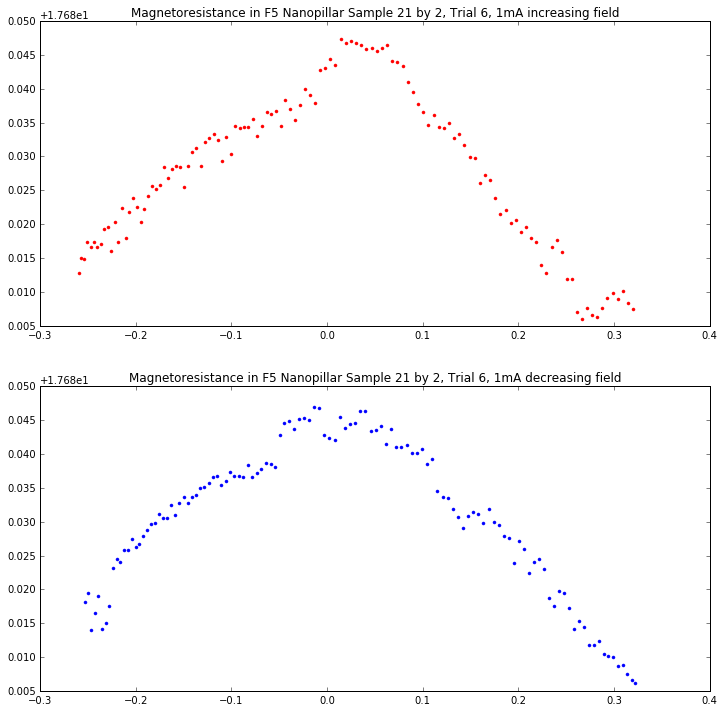

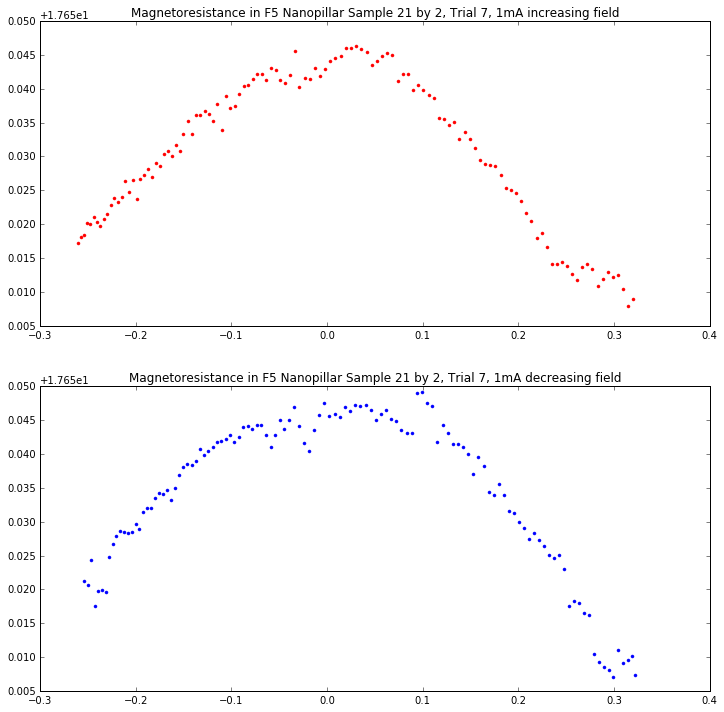

In [3]:
#Graham Jordan Prog with parts by Caspar Lant
from matplotlib.backends.backend_pdf import PdfPages
import sys
import numpy as np
import matplotlib.pyplot as plt
import math
from datetime import datetime
import os
%matplotlib inline
print("Note: for data sets not filtered by the kiethly use the filter when doing option 5")
    #naming conventions
np.set_printoptions(precision=3)
analyze = 1
Dict = {"y":1,"Y":1,"n":0,"N":0,"":0,"g":1,"G":1,"l":0,"L":0,'1':1}
Term = {1:'Increasing Field, Increasing Resistance',2:'Increasing Field, Decreasing Resistance',3:'Decreasing Field, Decreasing Resistance',4:'Decreasing Field, Decreasing Resistance'}
color = {1:'red',2:'green',3:'blue',4:'orange',5:'black'}
color2 = {1:'red',2:'blue'}
evens = {"1":1,"2":1,"3":2,"4":2}
direction = {1:'Up',2:'Down'}
Local = Dict[raw_input("Graham's Computer or Lab: G/L? ")]
ResTitle = {1:"Log of Resistance (ln[ohms])",0:"Resistance (Ohms)"}
if Local == 1:
    Location = "C:\Users\Graham\OneDrive\LabData\KentLab\data"
elif Local == 0:
    Location = "C:\Users\KentLab\Desktop\caspar\data"
sample = 1
while sample == 1:
    print("~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~")
    print("Analysis "+str(analyze))
    print("")
    title = "Magnetoresistance in F5 Nanopillar Sample "
    cont = 1
    title_index = 0
    DyeX = raw_input("X coordinate of sample ")
    DyeY = raw_input("Y coordinate of sample ")
    Current = raw_input("Current through sample (mA) ")
    while cont == 1:
        width = 12
        height = 12
        plt.figure(figsize=(width, height))
        if title_index == 1:
            print("~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~")
            print("Analysis "+str(analyze))
            print("")
        compare = 0
        print("enter: 1 for single graph, 2 for two comparative trial graphs, 3 to create PDF of all trials ")
        print("4 for separated single graph, 5 for Quad Split")
        compare = int(raw_input("Which option listed above? ")) #compare is the variable used to determine the process for the data
        #if compare == 5 or compare == 4:
            
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
            #option 1: Single Graph Print
        if compare == 1:
                #Data Grab
            j = raw_input("trial # ")
            field, resistance = np.loadtxt((Location+"\Sample_F5_"+DyeX+"_"+DyeY+"_"+Current+"mA_trial"+j+".txt"), skiprows=0 , unpack=True, delimiter='	')
                #separator and plotter (written by Caspar)
            color = []
            array = []
            i = 0
            while (i < len(field) - 1):
                if (float(field[i]) >= float(field[i+1])):
                    color = 'blue'
                else:
                    color = 'red'
            
                fig = plt.plot(field[i], (resistance[i] + math.fabs(float(i)/75000.00)), '.', color = color)
                i = i+1
                #plot title
            plt.ylabel("Resistance (Ohms)");
            plt.xlabel("Magnetic Field Strength (Tesla)");
            plt.title((title+DyeX+' by '+DyeY+', Trial '+str(j)+', '+str(Current)+'mA'))
            plt.show ()
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
            #option 2: Comparative Graph Print For 2 Trials    
        elif compare == 2 :
                    #data grab
            j = int(raw_input("first trial # "))
            a = int(raw_input("second trial # "))
            field, resistance = np.loadtxt((Location+"\Sample_F5_"+DyeX+"_"+DyeY+"_"+Current+"mA_trial"+str(j)+".txt"), skiprows=0 , unpack=True, delimiter='	')
            plt.subplot(2,1,1)
                #separator and plotter for 1st trial (written by Caspar)
            color = []
            array = []
            i = 0
        
            while (i < len(field) - 1):
                if (float(field[i]) >= float(field[i+1])):
                    color = 'blue'
                else:
                    color = 'red'
                fig = plt.plot(field[i], (resistance[i] + math.fabs(float(i)/75000.00)), '.', color = color)
                i = i+1
                #Plot titles
            plt.ylabel("Resistance (Ohms)");
            plt.xlabel("Magnetic Field Strength (Tesla)");
            plt.title((title+DyeX+' by '+DyeY+', Trial '+str(j)+', '+str(Current)+'mA'))
            
            field, resistance = np.loadtxt((Location+"\Sample_F5_"+DyeX+"_"+DyeY+"_"+Current+"mA_trial"+str(a)+".txt"), skiprows=0 , unpack=True, delimiter='	')
            plt.subplot(2,1,2)
                #Separator and plotter for 2nd trial (written by Caspar)
            color = []
            array = []
            i = 0
        
            while (i < len(field) - 1):
                if (float(field[i]) >= float(field[i+1])):
                    color = 'blue'
                else:
                    color = 'red'
                fig = plt.plot(field[i], (resistance[i] + math.fabs(float(i)/75000.00)), '.', color = color)
                i = i+1
                #Plot titles
            plt.ylabel("Resistance (Ohms)");
            plt.xlabel("Magnetic Field Strength (Tesla)");
            plt.title((title+DyeX+' by '+DyeY+', Trial '+str(a)+', '+str(Current)+'mA'))
            plt.show ()
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
                        #option 3: PDF of Trials 
        elif compare == 3:
            Split=Dict[raw_input('Split into two graphs of increasing field and decreasing field, Y/N? ')]
            if Split==1:
                FileName =str('Sample '+DyeX+'by'+DyeY+'_'+Current+ 'mA Graph Split')
            else:
                FileName = str('Sample '+DyeX+'by'+DyeY+'_'+Current+ 'mA')
            pp = PdfPages(FileName+'.pdf') #creates a PDF using the naming convention
            plt.savefig(pp, format='pdf')
            Trial = 1
            Fail = 0
            while Fail < 2:
                j = os.path.isfile((Location+"\Sample_F5_"+DyeX+"_"+DyeY+"_"+Current+"mA_trial"+str(Trial)+".txt"))
                if j is False:
                    Fail=Fail+1
                    Trial=Trial+1
                else:
                    i=0
                    UpField = []
                    DownField = []
                    UpRes = []
                    DownRes = []
                    field, resistance = np.loadtxt((Location+"\Sample_F5_"+DyeX+"_"+DyeY+"_"+Current+"mA_trial"+str(Trial)+".txt"), skiprows=0 , unpack=True, delimiter='	')
                    plt.figure(figsize=(width, height))
                    while (i < len(field)-1):
                        #separator and plotter (written by Caspar)
                        if (field[i] < field[i+1] ): # While the magnetic field is increasing the prog will place the values in the separate arrays
                            UpField.extend([field[i]])
                            UpRes.extend([resistance[i]])
                            i = i + 1
                        else : #Will place all remaining data points (the decreasing mag field side) in a separate array
                            DownField.extend([field[i]]) 
                            DownRes.extend([resistance[i]])
                            i = i +1
                    #plot title
                    plt.ylabel("Resistance (Ohms)");
                    plt.xlabel("Magnetic Field Strength (Tesla)");
                    if Split==0:
                        plt.plot(UpField, UpRes, '.', color='red',label='Increasing Field')
                        plt.plot(DownField, DownRes, '.', color='blue',label='Decreasing Field')
                        plt.title((title+DyeX+' by '+DyeY+', Trial '+str(Trial)+', '+str(Current)+'mA'))
                        plt.legend()
                    else:
                        plt.subplot(2,1,1)
                        plt.plot(UpField, UpRes, '.', color='red',label='Increasing Field')
                        plt.title((title+DyeX+' by '+DyeY+', Trial '+str(Trial)+', '+str(Current)+'mA increasing field'))
                        plt.subplot(2,1,2)
                        plt.plot(DownField, DownRes, '.', color='blue',label='Decreasing Field')
                        plt.title((title+DyeX+' by '+DyeY+', Trial '+str(Trial)+', '+str(Current)+'mA decreasing field'))
                    pp.savefig()
                    Trial=Trial+1
            pp.close()
            print('PDF Created: '+FileName+'.pdf')
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
            #option 4: Separate Plot into Increasing Field and Decreasing Field
        elif compare == 4 or compare == 5:
            philter = Dict[raw_input("Apply filter, Y/N? ")]
                #Data Grab
            j = raw_input("trial # ")
            field, resistance = np.loadtxt((Location+"\Sample_F5_"+DyeX+"_"+DyeY+"_"+Current+"mA_trial"+j+".txt"), skiprows=0 , unpack=True, delimiter='	')
            i = 0
            UpField = []
            DownField = []
            UpRes = []
            DownRes = []
            while (i < len(field)-1):
                #Seperator and filter (written by Graham)
                sig = np.std(resistance[(i-10):(i+10)])
                if philter == 1 and float(Current) < 1 and (abs(resistance[i]-resistance[i+1]) > (0.5*sig)):#Due to the lower currents having more variable data points (i.e. more noise) a stricter filter is applied of half a standard deviation
                    i=i+1
                elif philter == 1 and float(Current) < 1 and (abs(resistance[i]-resistance[i-1]) > (0.5*sig)):#Due to the lower currents having more variable data points (i.e. more noise) a stricter filter is applied of half a standard deviation
                    i=i+1
                elif philter == 1 and (abs(resistance[i]-resistance[i+1]) > (sig)): #should exclude any data point that is of a distance larger than the standard deviation from the next point
                    i=i+1
                elif philter == 1 and (abs(resistance[i]-resistance[i-1]) > (sig)): #should exclude any data point that is of a distance larger than the standard deviation from the next point
                    i=i+1
                elif (field[i] < field[i+1] ): # While the magnetic field is increasing the prog will place the values in the separate arrays
                    UpField.extend([field[i]])
                    UpRes.extend([resistance[i]])
                    i = i + 1
                else : #Will place all remaining data points (the decreasing mag field side) in a separate array
                    DownField.extend([field[i]]) 
                    DownRes.extend([resistance[i]])
                    i = i +1
                    #Plots and plot titles
            if compare == 4:
                    #Does an nth degree polynomial fit of the data (Still under construction, has trouble with very large n and with some samples that were not filtered by kiethly)
                Poly = Dict[raw_input("do a polynomial fit, Y/N? ")]
                if Poly == 1:
                    n = int(raw_input("What degree polynomial? "))
                    a = 1
                    UpCoeff = np.polyfit(UpField,UpRes,n)
                    DownCoeff = np.polyfit(DownField,DownRes,n)
                    while a <= 2:
                        x = eval(direction[a]+'Field')
                        y = eval(direction[a]+'Res')
                        firstx = min(x)
                        lastx = max(x)
                        step = 0.001
                        if firstx > lastx:
                            xfit = np.arange(lastx,firstx,step)
                        else:
                            xfit = np.arange(firstx,lastx,step)
                        i = 0
                        yfit = 0
                        while i <= n:
                            yfit = yfit+(xfit**(n-i))*eval(direction[a]+'Coeff')[i]
                            i = i+1
                        plt.subplot(2,1,a)
                        np.set_printoptions(precision=3)
                        if a == 1:
                            plt.title((title+DyeX+' by '+DyeY+', Trial '+str(j)+', '+str(Current)+'mA increasing field'))
                        else:
                            plt.title((title+DyeX+' by '+DyeY+', Trial '+str(j)+', '+str(Current)+'mA decreasing field'))
                        plt.plot(xfit,yfit,'b-',color = color[5], label=('Polynomial fit '))#+str(a)+ ' degree '+str(n))) 
                        plt.ylabel("Resistance (Ohms)");
                        plt.xlabel("Magnetic Field Strength (Tesla)");
                        plt.plot(x,y, '.', color = color2[a])
                        a = a+1
                        plt.legend()
                    print('Note: coefficients go in the order of C1x^n + C2x^(n-1) + ...')
                    print('Increasing Field Polynomial fit Coefficients: '+str(UpCoeff))
                    print('Decreasing Field Polynomial fit Coefficients: '+str(DownCoeff))
                    plt.show()
                else:
                    plt.subplot(2,1,1)
                    plt.plot(UpField, UpRes, '.', color='red')
                    plt.ylabel("Resistance (Ohms)");
                    plt.xlabel("Magnetic Field Strength (Tesla)");
                    plt.title((title+DyeX+' by '+DyeY+', Trial '+str(j)+', '+str(Current)+'mA increasing field'));
                    plt.subplot(2,1,2)
                    plt.plot(DownField, DownRes, '.', color='blue')
                    plt.ylabel("Resistance (Ohms)");
                    plt.xlabel("Magnetic Field Strength (Tesla)");
                    plt.title((title+DyeX+' by '+DyeY+', Trial '+str(j)+', '+str(Current)+'mA decreasing field'));
                    plt.show()
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
                #Option 5: Splits data into 4 quadrants as listed below
            elif compare == 5:
                s = max(UpRes)
                s = UpRes.index(s)
                Quad1 = [] #increasing field part 1
                Res1 = []
                Quad2 = [] #increasing field part 2
                Res2 = []
                Quad3 = [] #decreasing field part 1
                Res3 = []
                Quad4 = [] #decreasing field part 2
                Res4 = []
                #divides the increasing magnetic field plot into increasing resistance and decreasing resistance
                i = 0
                while (i < s ): 
                    Quad1.extend([UpField[i]])
                    Res1.extend([UpRes[i]])
                    i = i + 1
                while (i < len(UpRes)-1): 
                    Quad2.extend([UpField[i]])
                    Res2.extend([UpRes[i]])
                    i = i +1
                g = max(DownRes)
                g = DownRes.index(g)
                #divides decreasing magnetic field into increasing resistance and decreasing resistance
                i = 0
                while (i < g ): 
                    Quad4.extend([DownField[i]])
                    Res4.extend([DownRes[i]])
                    i = i + 1
                while (i < len(DownRes)-1): 
                    Quad3.extend([DownField[i]])
                    Res3.extend([DownRes[i]])
                    i = i +1
                a = 1
                STOP = 1
                    #Horizontal filter (under construction)
                while a<= 4:
                    i=0
                    X,Y = 0,0
                    X,Y = [],[]
                    while i < (len(eval("Quad"+str(a)))-1):
                        sig = np.std(resistance)
                        if abs(eval("Quad"+str(a))[i]-eval("Quad"+str(a))[i+1]) > (0.5*sig) and philter == 1 and STOP == 0:
                            i = i+1
                        elif abs(eval("Quad"+str(a))[i]-eval("Quad"+str(a))[i-1]) > (0.5*sig) and philter == 1 and STOP == 0:
                            i = i+1
                        else:
                            X.append(eval("Quad"+str(a))[i])
                            Y.append(eval("Res"+str(a))[i])
                            i = i+1
                    if a ==1:
                        Quad1 = np.array(X)
                        Res1 = np.array(Y)
                    elif a ==2:
                        Quad2 = np.array(X)
                        Res2 = np.array(Y)
                    elif a ==3:
                        Quad3 = np.array(X)
                        Res3 = np.array(Y)
                    elif a ==4:
                        Quad4 = np.array(X)
                        Res4 = np.array(Y)
                    a = a+1
                a = 1
                x = []
                y = []
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
                #Fitter (under construction-Linear works)
                Fit = Dict[raw_input("do a fit of the data, Y/N? ")]
                Log = 0
                if Fit == 1:
                    Log = Dict[raw_input("Logrithmic Fit, Y/N? (default is Linear) ")] 
                    if Log == 1:
                        Res1 = np.log(Res1)
                        Res2 = np.log(Res2)
                        Res3 = np.log(Res3)
                        Res4 = np.log(Res4)
                    def LineFit(x, y):
                #Returns slope and y-intercept of linear fit to (x,y) data set
                        xavg = x.mean()
                        B = np.array((y*(x-xavg)).sum()/(x*(x-xavg)).sum()) # slope
                        A = np.array(y.mean()-B*xavg)    # intercept
                        return B, A
                    while a <= 4:
                        x = eval("Quad"+str(a))
                        y = eval("Res"+str(a))
                        B,A = LineFit(x,y)
                        Coeff = np.around([B, A], decimals=3)
                        firstx = x[0]
                        lastx = x[-1]
                        step = 0.001
                        if firstx > lastx:
                            xfit = np.arange(lastx,firstx,step)
                        else:
                            xfit = np.arange(firstx,lastx,step)
                        yfit = A + B*xfit
                        Loc = evens[str(a)]
                        plt.subplot(2,1,Loc)    
                        plt.plot(xfit,yfit,'b-',color = color[a], label=('Linear fit '+str(a)))
                        print(Term[a]+" equation: Resistance = "+str(Coeff[0])+"(Ohms/mTesla)*Magnetic Field + "+str(Coeff[1])+" Ohms")
                        plt.plot(x,y, '.', color = color[a])
                        a = a+1
                        plt.legend()
        
                plt.subplot(2,1,1)    
                plt.plot(Quad1,Res1, '.', color = 'red', label='increasing resistance')
                plt.ylabel(ResTitle[Log]);
                plt.xlabel("Magnetic Field Strength (Tesla)");
                plt.title((title+DyeX+' by '+DyeY+', Trial '+str(j)+', '+str(Current)+'mA increasing field'));
                plt.plot(Quad2,Res2, '.', color = 'green', label='decreasing resistance')
                plt.legend()
                plt.subplot(2,1,2)
                plt.plot(Quad3,Res3, '.', color = 'blue', label='decreasing resistance')
                plt.ylabel(ResTitle[Log]);
                plt.xlabel("Magnetic Field Strength (Tesla)");
                plt.title((title+DyeX+' by '+DyeY+', Trial '+str(j)+', '+str(Current)+'mA decreasing field'));
                plt.plot(Quad4,Res4, '.', color = 'orange', label='increasing resistance')
                plt.legend()
                plt.show()
        analyze= analyze + 1
        title_index = 1
        cont = Dict[raw_input("Continue with this sample, Y/N? ")]
    sample = Dict[raw_input("Change sample, Y/N? ")]
print("Good bye")

In [7]:
# # # # # # enter: 1 for single graph, 2 for two comparative trial graphs, 3 for range of trials 
# # # # # # 4 for separated single graph, 5 for Quad Split
# # # # # # Which option listed above? 4
# # # # # # Apply filter, Y/N? y
# # # # # # trial # 3
# # # # # # do a polynomial fit, Y/N? y
# # # # # # What degree polynomial? 9
# # # # # X coordinate of sample 19
# # # # # Y coordinate of sample 2
# # # # Current through sample (mA) 1
# # # # enter: 1 for single graph, 2 for two comparative trial graphs, 3 for range of trials 
# # # 4 for separated single graph, 5 for Quad Split
# # # Which option listed above? 4
# # Apply filter, Y/N? n
# # trial # 2
# do a polynomial fit, Y/N? y
# What degree polynomial? 16

SyntaxError: invalid syntax (<ipython-input-7-4ac6c802c059>, line 8)